Best k Value and Score
k        23.000000
Score     0.964912
Name: 22, dtype: float64


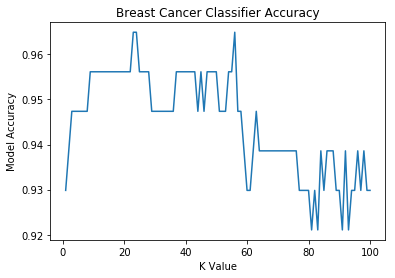

In [24]:
# In this project I use the K-Nearest Neighbors implementation in scikit-learn to classify features in MRI scans as either malignant or benign

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

breast_cancer_data = load_breast_cancer()
#print(breast_cancer_data.data[0])
#print(breast_cancer_data.feature_names)
#print(breast_cancer_data.target)
#print(breast_cancer_data.target_names)

# Load the data into the train_test_split function
training_data, validation_data, training_labels, validation_labels = train_test_split(breast_cancer_data.data, breast_cancer_data.target, test_size=0.2, random_state=100)

# We don't know the best number of neighbors, so we can loop through a number and find out
k=[]
for i in range(1, 101):
    # Initialize the classifier with argument n_neighbors equal to the index of the loop
    classifier = KNeighborsClassifier(n_neighbors = i)
    # Fit the classifier to the training data and labels
    classifier.fit(training_data, training_labels)
    # Score the model against the test data and labels
    score_i = classifier.score(validation_data,validation_labels)
    # Append the results for each iteration to the k vector
    k.append([i, score_i]) 

# We could select the best k value by loading the vector into a dataframe and using the Pandas library to locate the maximum value in a column and return the corresponding row
df = pd.DataFrame(k, columns=['k', 'Score'])
k_best = df.loc[df['Score'].idxmax()]
print("Best k Value and Score")
print(k_best)

# Split the k vector with a list comprehension so that we can plot its indices against each other
x_vals = [i[0] for i in k]
y_vals = [i[1] for i in k]

# We could also initialize the plot to show the relationship between n_neighbors and the performance of the model
plt.plot(x_vals, y_vals)
plt.xlabel("K Value")
plt.ylabel("Model Accuracy")
plt.title("Breast Cancer Classifier Accuracy")

plt.show()
# This KNN Classifier is 96.5% accurate at classifying features in MRI scans